# Model fitting

In [1]:
#!/usr/bin/python
# by DBR 2/2017 #

%matplotlib inline  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from all_models import *
from scipy.stats import norm
from time import time

#plt.style.use('seaborn-white')
plt.style.use('ggplot')

#upload data
prim_df = pd.DataFrame.from_csv('data/prim_df.csv')
prim_weeks = pd.DataFrame.from_csv('data/prim_weeks.csv')
ATI_df = pd.DataFrame.from_csv('data/ATI_df.csv')
ATI_weeks = pd.DataFrame.from_csv('data/ATI_weeks.csv')

#names of 8 good rebounds
ATI_list = [['Z09087','Z09106','Z09192','Z09204'],
            ['Z09144','Z08214','A11200','Z09196']] 

#colors for plotting
cz=[['darkcyan','indigo','blue', 'royalblue'],
    ['indianred', 'darkred', 'salmon', 'red']]


/Users/danielreeves/anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
#names of parameters to vary
param_names=[r'$\alpha_S$',
             r'$\delta_S$',
             r'$\beta$',
             r'$\tau$',
             r'$\delta_U$',
             r'$\delta_P$',
             r'$\kappa$',
             r'$\alpha_E$',
             r'$\delta_E$',
             r'$E_{50}$',
             r'$\omega$',
             r'$\pi$',
             r'$\gamma$',
             r'$S_0$',
             r'$E_0$']


In [3]:
#intial parameter guesses, from average primary infection fitting

#pegged parameters
Bt = 1e-4;  #infectivity [cells/virion-day]
tau= 0.05   #productively infected probability
dP = 1;     #productively infected death rate [1/day]
dU = 1;     #unproductively infected death rate [1/day]
dI = dP
aE = 1e-4; #initial E cell concentration [cells/uL]
p  = 5e4    #leak+burst viral production rate [virions/cell]
g  = 23     #viral clearance [1/day]

'''
$\alpha_S$ & 128.933 & 49.457 & 53.338 \\
$\delta_S$ & 0.461 & 0.157 & 0.243 \\
$\delta_E$ & 0.002 & 0.003 & 0.004 \\
$E_{50}$ & 246.635 & 52.803 & 257.154 \\
$\omega$ & 1.207 & 0.452 & 0.654 \\
$\kappa$ & 0.55 & 0.354 & 0.37 \\
$S_0$ & 650.691 & 184.852 & 319.939 \\
$E_0$ & 1.484 & 0.97 & 0.929 \\
'''

'''
aS = 130;   #constant growth rate of susceptibles [cells/uL/day]
dS = 0.46;   #susceptible death rate [1/day] 
dE = 0.002;   #immune death rate [1/day]
E50= 246;   #50 pct max E cell concentration [cells/uL]
w  = 1.207;  #immune cell multiplier [1/day]
k  = 0.55;    #immune cell killing rate [1/day]
S0 = 650
E0 = 1.5
'''

aS = 100;   #constant growth rate of susceptibles [cells/uL/day]
dS = 0.3;   #susceptible death rate [1/day] 
k  = 0.01;  #immune cell killing rate [1/day]
w  = 0.01;  #immune cell multiplier [1/day]
dE = 0.003; #immune death rate [1/day]
E50= 250;   #50 pct max E cell concentration [cells/uL]
S0 = 200;   #initial susceptible [cells/uL]
E0 = 1;     #initial cytolytic [cells/uL]


#initial conditions that are always true regardless of model
U0=0      #no infected cells
P0=0      #productively infected cells
V0=0.03   #start with 30 copies per mL


guess1 = aS,dS,dU,dP,dE,E50,w,k,S0,E0
guess2 = aS,dS,dE,E50,w,k,S0,E0
guess3 = aS,dS,dE,E50,w,k,S0,E0
guess4 = aS,dS,dE,E50,w,k,S0,E0
guess5 = aS,dS,S0
guess6 = aS,dS,S0

pz=np.array([len(guess1),len(guess2),len(guess3),len(guess4),len(guess5),len(guess6)]) #number of parameters in each model

In [4]:
def make_bounds(guess,fac):
    return tuple([tuple(np.array(guess)/fac),tuple(np.array(guess)*fac)])
    


In [5]:

#fit the models
run_time0=time()

fac=100

po_list=[[],[],[],[],[],[]]; pc_list=[[],[],[],[],[],[]]; #intialize arrays
m_list=range(25) #choose which monkeys to fit
for m in m_list:

    t_data = prim_weeks.values[:,0]*7 #put in days scale
    V_data = np.log10(prim_df.iloc[:,m].interpolate(method='linear',axis=0,limit=2)) #use log data

    #model 1 fit
    po, pc = curve_fit(fit1, t_data, V_data, p0=guess1, bounds=make_bounds(guess1,fac),sigma=1,absolute_sigma=True,
                        max_nfev=1e3, xtol=1e-15, ftol=1e-15, gtol=1e-15)
    po_list[0].append(po); pc_list[0].append(pc)

    #model 2 fit
    po, pc = curve_fit(fit2, t_data, V_data, p0=guess2, bounds=make_bounds(guess2,fac),sigma=1,absolute_sigma=True,
                        max_nfev=1e3, xtol=1e-15, ftol=1e-15, gtol=1e-15)
    po_list[1].append(po); pc_list[1].append(pc)

    #model 3 fit
    po, pc = curve_fit(fit3, t_data, V_data, p0=guess3, bounds=make_bounds(guess3,fac),sigma=1,absolute_sigma=True,
                        max_nfev=1e3, xtol=1e-15, ftol=1e-15, gtol=1e-15)
    po_list[2].append(po); pc_list[2].append(pc)

    #model 4 fit
    po, pc = curve_fit(fit4, t_data, V_data, p0=guess4, bounds=make_bounds(guess4,fac),sigma=1,absolute_sigma=True,
                        max_nfev=1e3, xtol=1e-15, ftol=1e-15, gtol=1e-15)
    po_list[3].append(po); pc_list[3].append(pc)

    #model 5 fit
    po, pc = curve_fit(fit5, t_data, V_data, p0=guess5, bounds=make_bounds(guess5,fac),sigma=1,absolute_sigma=True,
                        max_nfev=1e3, xtol=1e-15, ftol=1e-15, gtol=1e-15)
    po_list[4].append(po); pc_list[4].append(pc)

    #model 6 fit
    po, pc = curve_fit(fit6, t_data, V_data, p0=guess6, bounds=make_bounds(guess6,fac),sigma=1,absolute_sigma=True,
                        max_nfev=1e3, xtol=1e-15, ftol=1e-15, gtol=1e-15)
    po_list[5].append(po); pc_list[5].append(pc)

    print(m,np.round(time()-run_time0,3))


0 7.233
1 15.497
2 21.93
3 27.171
4 36.079
5 42.824
6 48.358
7 55.979
8 66.022
9 73.361
10 84.094
11 93.31
12 101.179
13 108.529
14 113.771
15 122.417
16 132.609
17 139.788
18 147.777
19 156.93
20 166.177
21 175.618
22 184.841
23 196.217
24 202.507


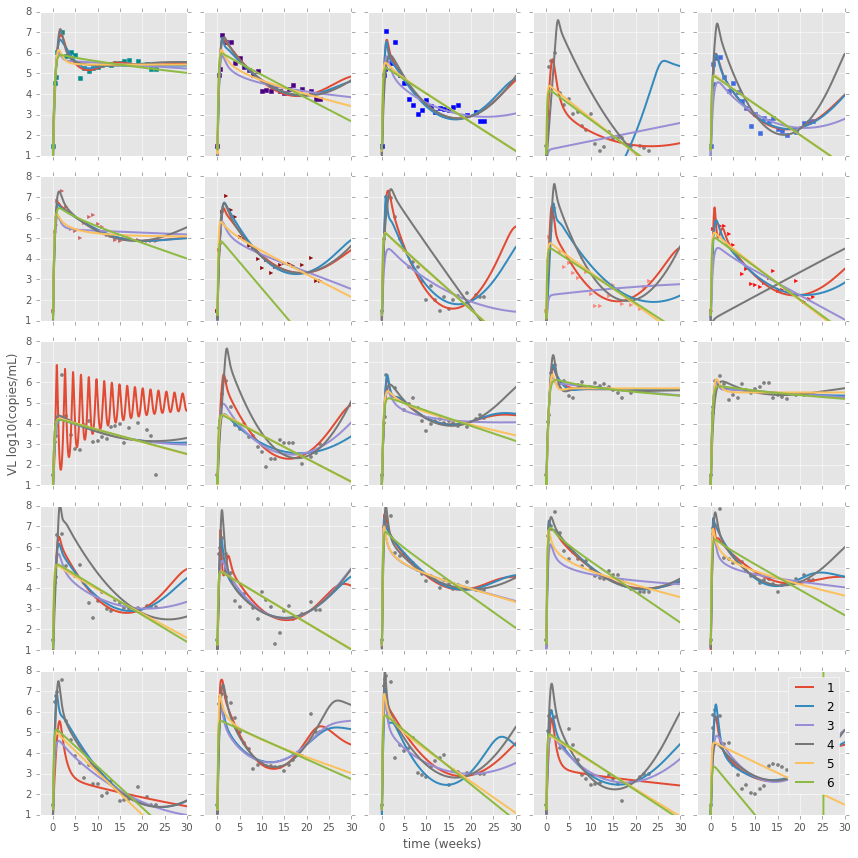

In [6]:
#calculate likelihoods and AIC
#now plot viral load fits

# 
# 1. complete
# 2. same natural death rate U and P
# 3. E doesn't get recruited by presence of U cells
# 4. no U
# 5. no E
# 6. no E and no U
# 

modelz=range(6)
lk_list=[[],[],[],[],[],[]];
AIC_arr=np.zeros([len(modelz),25])

Vscl=0.5

Vs=[[],[],[],[],[],[]]
AIC_arr=np.zeros([len(modelz),25])

cind=0; tind=0
tt=np.linspace(0,30*7,1e4)
fig,axarr = plt.subplots(5,5,sharex=True,sharey=True,figsize=(12,12),dpi=600)
for m in m_list:
    
    if prim_df.keys()[m] in ATI_list[0]:
        markz='s'
        color=cz[0][cind]
        cind+=1
    elif prim_df.keys()[m] in ATI_list[1]:
        markz='>'
        color=cz[1][tind]
        tind+=1
    else:
        markz='o'
        color='gray'
    
    t_data = prim_weeks.values[:,0]*7 #put in days scale
    V_data = np.log10(prim_df.iloc[:,m].interpolate(method='linear',axis=0,limit=2)) #use log data

    aS,dS,dU,dP,dE,E50,w,k,S0,E0=po_list[0][m]
    V_sim = fit1(t_data,aS,dS,dU,dP,dE,E50,w,k,S0,E0)
    lk_list[0].append(np.log(np.nanprod(norm.pdf(x=V_sim,loc=V_data,scale=Vscl)))) #log likelihood
    Vs[0]=fit1(tt,aS,dS,dU,dP,dE,E50,w,k,S0,E0)
    
    aS,dS,dE,E50,w,k,S0,E0=po_list[1][m]
    V_sim = fit2(t_data,aS,dS,dE,E50,w,k,S0,E0)
    lk_list[1].append(np.log(np.nanprod(norm.pdf(x=V_sim,loc=V_data,scale=Vscl)))) #log likelihood
    Vs[1] = fit2(tt,aS,dS,dE,E50,w,k,S0,E0)

    aS,dS,dE,E50,w,k,S0,E0=po_list[2][m]
    V_sim = fit3(t_data,aS,dS,dE,E50,w,k,S0,E0)
    lk_list[2].append(np.log(np.nanprod(norm.pdf(x=V_sim,loc=V_data,scale=Vscl)))) #log likelihood
    Vs[2] = fit3(tt,aS,dS,dE,E50,w,k,S0,E0)

    aS,dS,dE,E50,w,k,S0,E0=po_list[3][m]
    V_sim = fit4(t_data,aS,dS,dE,E50,w,k,S0,E0)
    lk_list[3].append(np.log(np.nanprod(norm.pdf(x=V_sim,loc=V_data,scale=Vscl)))) #log likelihood
    Vs[3] = fit4(tt,aS,dS,dE,E50,w,k,S0,E0)

    aS,dS,S0=po_list[4][m]
    V_sim = fit5(t_data,aS,dS,S0)
    lk_list[4].append(np.log(np.nanprod(norm.pdf(x=V_sim,loc=V_data,scale=Vscl)))) #log likelihood
    Vs[4] = fit5(tt,aS,dS,S0)

    aS,dS,S0=po_list[5][m]
    V_sim = fit6(t_data,aS,dS,S0)
    lk_list[5].append(np.log(np.nanprod(norm.pdf(x=V_sim,loc=V_data,scale=Vscl)))) #log likelihood
    Vs[5]=fit6(tt,aS,dS,S0)

    ax=axarr[int(np.floor(m/5))][m-int(np.floor(m/5))*5]
    ax.scatter(t_data/7,V_data,color=color,alpha=1,s=10,marker=markz)
    for i in modelz:
        ax.plot(tt/7,Vs[i],lw=2)

    
    AIC=2*pz-2*np.array(lk_list)[:,m]
    AIC_arr[:,m]=AIC

axarr[2][0].set_ylabel('VL log10(copies/mL)')
axarr[4][2].set_xlabel('time (weeks)')
ax.set_xlim([-3,30])
ax.set_ylim([1,8])
ax.legend([str(modelz[_]+1) for _ in range(len(modelz))])
fig.tight_layout()
fig.savefig('figures/nested_VL.pdf')  # No warning now
    


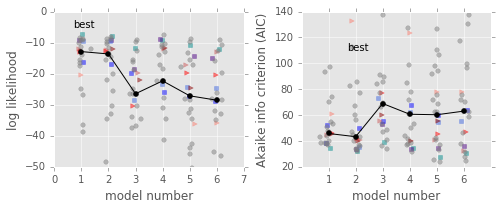

In [7]:
fig2=plt.figure(figsize=(7,3),dpi=600)
ax1=fig2.add_subplot(121)
ax2=fig2.add_subplot(122)

cind=0; tind=0
for m in m_list:
    if prim_df.keys()[m] in ATI_list[0]:
        markz='s'
        color=cz[0][cind]
        cind+=1
    elif prim_df.keys()[m] in ATI_list[1]:
        markz='>'
        color=cz[1][tind]
        tind+=1
    else:
        markz='o'
        color='gray'
    ax1.scatter(np.arange(1,len(AIC)+1)+np.random.normal(0,0.1,[1,len(AIC)]),np.array(lk_list)[:,m],color=color,alpha=0.5,s=20,marker=markz)
    ax2.scatter(np.arange(1,len(AIC)+1)+np.random.normal(0,0.1,[1,len(AIC)]),AIC_arr[:,m],color=color,alpha=0.5,s=20,marker=markz)

ax1.plot(np.arange(1,len(AIC)+1),np.nanmedian(np.array(lk_list),1),color='k',marker='o',markersize=5)
ax1.set_ylim([-50,0])
ax1.set_ylabel('log likelihood')
ax1.set_xlabel('model number')
ax1.annotate('best',(0.7,-5))

ax2.plot(np.arange(1,len(AIC)+1),np.nanmedian(AIC_arr,1),color='k',marker='o',markersize=5)
ax2.set_xticks(range(1,7))
ax2.set_ylim([20,140])
ax2.set_ylabel('Akaike info criterion (AIC)')
ax2.set_xlabel('model number')
ax2.annotate('best',(1.7,110))


fig2.tight_layout()
fig2.savefig('figures/nested_AIC.pdf')  # No warning now



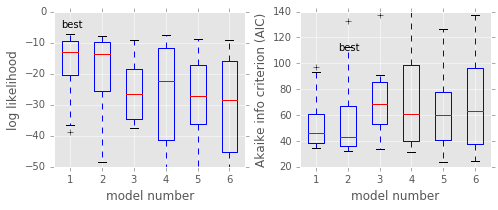

In [9]:
plt.figure(figsize=(7,3), dpi=600)

plt.subplot(121)
plt.boxplot(np.transpose(np.array(lk_list)))
plt.ylim([-50,0])
plt.ylabel('log likelihood')
plt.xlabel('model number')
plt.annotate('best',(0.7,-5))

plt.subplot(122)
plt.boxplot(np.transpose(AIC_arr))
plt.ylim([20,140])
plt.ylabel('Akaike info criterion (AIC)')
plt.xlabel('model number')
plt.annotate('best',(1.7,110))

plt.tight_layout()
plt.savefig('figures/nested_AIC_boxes.pdf')  # No warning now
